# Wrangle and Analyze Data - WeRateDogs®

The dataset that will be wrangled (and analyzed and visualized) is the tweet archive of Twitter user @dog_rates, also known as **WeRateDogs**. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively which will be used in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017

## Project Details
Tasks in this project are as follows:

### Data wrangling, which consists of:
 **Part I.** Gathering data 
<br>**Part II.** Assessing data
<br>**Part III.** Cleaning data

### Storing, analyzing, and visualizing your wrangled data
Reporting on 
1. Data wrangling efforts and 
2. Data analyses and visualizations

## Data Wrangling : Part I. - Gathering Data

We have decided to gather the data from these sources as of now:

1. The WeRateDogs Twitter archive. It is as a file that is on hand, as we were provided this by the official twitter archive of WeRateDogs®. 

2. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. We shall download this file programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

3. Each tweet's retweet count and favorite ("like") count at minimum, and any additional data we find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, we would query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data would be written to its own line. Then this .txt file would be read line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. 

In [1]:
#importing the essential modules needed for the project
import pandas as pd
import numpy as np

In [2]:
#Gathering the WeRateDogs Twitter archive, which we have on hand.
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive_enhanced.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


We have gathered the data from the first source. Now let's move onto the second one.
<br> Since the second source requires us to download the file about the tweet image predictions and is available online. Let's try to grab that file and download it programmatically.

In [4]:
# importing the required library for requesting to doanload locally programmatically.
import requests
import os

In [5]:
# Make directory if it doesn't exists.
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Getting the response
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Creating and writing the files.content
with open(os.path.join(folder_name,url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [6]:
# Importing data and Visual Assessment
image_pred = pd.read_csv('image_predictions/image-predictions.tsv', sep = '\t')
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


We have gathered the data from the second source as well. Now let's move onto the final one.
Since the final source requires us to grab at least each tweet's retweet count and favorite ("like") count, and any additional data we find interesting. We would have to use Twitter API for extracting this info.

In [7]:
# The tweet ids for which we need to determine the info like the number of retweets and count 
tweet_ids = twitter_archive_enhanced.tweet_id

In [8]:
#creating an API object that can be used to gather Twitter data.
import tweepy

consumer_key = '...'
consumer_secret = '...'
access_token = '...'
access_secret = '...'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [36]:
# Checking the code with one tweet id, so that it can be looped over the entire series of ids from the archived dataset
tweet = api.get_status(666020888022790149, tweet_mode='extended')
tweet._json

{'created_at': 'Sun Nov 15 22:32:08 +0000 2015',
 'id': 666020888022790149,
 'id_str': '666020888022790149',
 'full_text': 'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj',
 'truncated': False,
 'display_text_range': [0, 131],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 666020881337073664,
    'id_str': '666020881337073664',
    'indices': [108, 131],
    'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
    'url': 'https://t.co/BLDqew2Ijj',
    'display_url': 'pic.twitter.com/BLDqew2Ijj',
    'expanded_url': 'https://twitter.com/dog_rates/status/666020888022790149/photo/1',
    'type': 'photo',
    'sizes': {'medium': {'w': 960, 'h': 720, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'large': {'w': 960, 'h': 720, 'resize': 'fit

In [29]:
import json
tweet_data = []
tweet_id_success = []
tweet_id_missing = []
for tweet_id in tweet_ids:
    try:
        data = api.get_status(tweet_id, 
                              tweet_mode='extended')
        tweet_data.append(data._json)
        tweet_id_success.append(tweet_id)
    except Exception as e:
        tweet_id_missing.append(tweet_id)
        print(str(tweet_id) + '_' + str(e))

888202515573088257_[{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921_[{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937_[{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745_[{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329_[{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744_[{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320_[{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130_[{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560_[{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705_[{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984_[{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648_[{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778_[{'code': 144, 'message': 'No sta

Rate limit reached. Sleeping for: 648


680055455951884288_[{'code': 144, 'message': 'No status found with that ID.'}]


In [30]:
# Write tweet data to json file
with open('tweet_json.txt', mode = 'w') as file:
    json.dump(tweet_data, file)

In [35]:
# Load the Twitter API data
twitter_query = pd.read_json('tweet_json.txt')
twitter_query['tweet_id'] = tweet_id_success
twitter_query = twitter_query[['tweet_id', 'favorite_count', 'retweet_count']]
twitter_query

,tweet_id,favorite_count,retweet_count
0,892420643555336193,36715,7830
1,892177421306343426,31612,5797
2,891815181378084864,23819,3840
3,891689557279858688,40028,7990
4,891327558926688256,38240,8633
...,...,...,...
2328,666049248165822465,99,41
2329,666044226329800704,276,134
2330,666033412701032449,117,43
2331,666029285002620928,121,43


With this, we have gathered all the three files that we need for further analysis. Before we can get any valueable insights from the data sets we need to assess and clean the sets. So let's begin.

## Data Wrangling : Part II. - Assessing Data

After gathering each of the above pieces of data, let us asses them visually and programmatically for quality and tidiness issues. Some key points to keep in mind when data wrangling for this project:

- We would only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
- Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
- Cleaning includes merging individual pieces of data according to the rules of tidy data.
- The fact that the rating numerators are greater than the denominators does not need to be cleaned. This unique rating system is a big part of the popularity of WeRateDogs.
- We do not need to gather the tweets beyond August 1st, 2017. We can, but we won't be able to gather the image predictions for these tweets since we don't have access to the algorithm used.

So we have three datasets as of now namely:
- `twitter_archive_enhanced` - containing the downloaded archived dataset from WeRateDogs®
- `image_pred` - containing the dataset predicting the dog type from its image
- `twitter_query` - contains the data pertaining to the number of retweets and favorites

In [37]:
twitter_archive_enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [40]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [55]:
# Let's check if the datatype of 'in_reply_to_status_id' is correct or not
twitter_archive_enhanced[~(twitter_archive_enhanced['in_reply_to_status_id'].isnull())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [138]:
# Let's check if the row with non Nan values of 'retweeted_status_id' 
twitter_archive_enhanced[~(twitter_archive_enhanced['retweeted_status_id'].isnull())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [79]:
# There seems to be some wrongly extracted names. These all have one thing in common which is that they start
# with a lower case letter so let's extract those names which have their initial letter to be lower case.
wrong_names = twitter_archive_enhanced[twitter_archive_enhanced['name'].str[0].str.islower()]
print(wrong_names['name'].value_counts())
wrong_names[['text','name']] #checking how the names were mismatched
# To display all results
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
#     print(wrong_names[['text','name']])

a               55
the              8
an               7
very             5
quite            4
one              4
just             4
actually         2
mad              2
not              2
getting          2
old              1
his              1
life             1
my               1
incredibly       1
infuriating      1
such             1
space            1
all              1
officially       1
this             1
unacceptable     1
by               1
light            1
Name: name, dtype: int64


,text,name
22,I've yet to rate a Venezuelan Hover Wiener. Th...,such
56,Here is a pupper approaching maximum borkdrive...,a
118,RT @dog_rates: We only rate dogs. This is quit...,quite
169,We only rate dogs. This is quite clearly a smo...,quite
193,"Guys, we only rate dogs. This is quite clearly...",quite
...,...,...
2349,This is an odd dog. Hard on the outside but lo...,an
2350,This is a truly beautiful English Wilson Staff...,a
2352,This is a purebred Piers Morgan. Loves to Netf...,a
2353,Here is a very happy pup. Big fan of well-main...,a


In [56]:
# Let's view the sources for these tweets
twitter_archive_enhanced['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [84]:
twitter_archive_enhanced['name'].value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Rooney       1
Perry        1
Ace          1
Aqua         1
Mo           1
Name: name, Length: 957, dtype: int64

In [207]:
twitter_archive_enhanced.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

Let's check why the ratings are below 10 for some rows.

In [38]:
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [41]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [39]:
twitter_query

,tweet_id,favorite_count,retweet_count
0,892420643555336193,36715,7830
1,892177421306343426,31612,5797
2,891815181378084864,23819,3840
3,891689557279858688,40028,7990
4,891327558926688256,38240,8633
...,...,...,...
2328,666049248165822465,99,41
2329,666044226329800704,276,134
2330,666033412701032449,117,43
2331,666029285002620928,121,43


In [42]:
twitter_query.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333 entries, 0 to 2332
Data columns (total 3 columns):
tweet_id          2333 non-null int64
favorite_count    2333 non-null int64
retweet_count     2333 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [43]:
all_columns = pd.Series(list(twitter_archive_enhanced) + list(image_pred) + list(twitter_query))
all_columns[all_columns.duplicated()]

17    tweet_id
29    tweet_id
dtype: object

In [54]:
len(tweet_id_missing)

23

In [52]:
len(tweet_id_success)

2333

### Quality Issues
#### `twitter_archive_enhanced` dataset
- Address 181 Tweet ids of retweets in the `twitter_archive_enhanced` dataset that we do not need it for our analysis
- Address the rows for which we do not have image pred/Address tweets posted after August 1st, 2017
- None values in the 'name', 'doggo', 'floofer', 'pupper', and 'puppo' columns
- Timestamp and retweeted_status_timestamp columns not being in the datetime format
- HTML codes in the source values
- Tweet id is in int type
- Rows with `wrong_names`. We may choose to change or remove the rows with wrong data according to the final analysis that needs to be done. If that depends on the name of the dog, we may modify the name, otherwise not.
- Excess columns which may be unnecessary
- Unstandarized ratings for analysis

#### `image_pred` dataset
- 2356 tweet ids in the `twitter_archive_enhanced` dataset vs 2075 in this dataset. Maybe all the ids did not have an image attached with them

#### `twitter_query` dataset
- 2333 rows in this dataset vs 2356 tweet ids in the `twitter_archive_enhanced` dataset. The remaining 23 rows are accounted in the tweet_id_missing array.

### Tidiness Issues
#### `twitter_archive_enhanced` dataset
- one variable (dog stage) in four different columns (doggo, floofer, pupper, and puppo)

#### `image_pred` dataset
- this table can be merged onto the `twitter_archive_enhanced` dataset

#### `twitter_query` dataset
- this table can also be merged onto the `twitter_archive_enhanced` dataset

## Data Wrangling : Part III. - Cleaning Data

Let's clean each of the issues that we documented while assessing. The result shall be a high quality and tidy master pandas DataFrame(s). 

In [85]:
# Let's first make copies of the dataframes and rename them with easy names this time.
df_1 = twitter_archive_enhanced.copy()
df_2 = image_pred.copy()
df_3 = twitter_query.copy()

While cleaning, we amy always aim to first address any missing values that we may impute. Then address the tidiness issues, if any, and then go for issues that are related to with respect to the quality of the dataframe which may cause any kind of accuracy, consistency, validation, or completion errors.

In this case, we have missing values which are in the for of None values in the 'name', 'doggo', 'floofer', 'pupper', and 'puppo' columns. However, we will not be imputing them in this analysis. So let's first address the tidiness issue and merge all the dataframes.

### Tidiness Issue I. 

#### Merging all datasets

##### Define
Let's merge all the datasets and make the analysis tidy. We can do that by merging on the 'tweet_id' and dropping all the rows that do not match.

##### Code

In [98]:
# Let's first merge the df_1 and df_2
df_m1 = pd.merge(df_1, df_2, how='inner', on='tweet_id')
# Now let's merge this new merged dataframe with df_3
df = pd.merge(df_m1, df_3, how='inner', on='tweet_id')

##### Test

In [99]:
list(df.columns)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'favorite_count',
 'retweet_count']

### Tidiness Issue II. 

#### Melting four columns (doggo, floofer, pupper, and puppo) into one variable

##### Define
Let's code to turn all the four columns into one. Also let's aim to replace the 'None' names with Nan. 

##### Code

In [119]:
dog_type_list = []
for n in df.tweet_id.index:
    if df.iloc[n]['doggo'] == 'doggo':
        dog_type_list.append('doggo')
    elif df.iloc[n]['floofer'] == 'floofer':
        dog_type_list.append('floofer')
    elif df.iloc[n]['pupper'] == 'pupper':
        dog_type_list.append('pupper')
    elif df.iloc[n]['puppo'] == 'puppo':
        dog_type_list.append('puppo')
    else:
        dog_type_list.append(np.nan)

In [ ]:
df['dog_type'] = dog_type_list

In [133]:
# Drop doggo, floofer, pupper, and puppo columns
df = df.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

##### Test

In [131]:
df['dog_type'].value_counts()

pupper     211
doggo       78
puppo       23
floofer      7
Name: dog_type, dtype: int64

In [134]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'favorite_count', 'retweet_count', 'dog_type'],
      dtype='object')

In [137]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,36715,7830,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,31612,5797,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,23819,3840,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,40028,7990,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,38240,8633,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,99,41,NaN
2057,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,276,134,NaN
2058,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,True,malinois,0.138584,True,bloodhound,0.116197,True,117,43,NaN
2059,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,121,43,NaN


### Quality Issue I. 

#### Dropping 181 records from the dataframe which are retweets

##### Define
We may first find the records who have retweeted_status_id not equal to Nan. Then we can drop the records in the main dataframe with the same Tweet_id as that of those with retweets.

##### Code

In [155]:
# Let's check what is the row index with non Nan values of 'retweeted_status_id' 
retweet_index = df[~(df['retweeted_status_id'].isnull())].tweet_id.index
retweet_index

Int64Index([  32,   67,  107,  130,  167,  182,  209,  220,  223,  255,  261,
             262,  276,  309,  318,  322,  328,  337,  346,  347,  352,  361,
             365,  371,  381,  412,  419,  424,  428,  430,  437,  440,  445,
             458,  462,  469,  470,  471,  472,  473,  474,  475,  484,  492,
             494,  499,  522,  525,  541,  553,  568,  576,  587,  588,  599,
             606,  609,  616,  635,  645,  649,  655,  675,  694,  698,  713,
             717,  729,  732,  747,  764, 1024, 1965, 1966],
           dtype='int64')

Out of the 181 rows discussed earlier, it seems that some have been removed while merging the dataset. This clearly shows the importance of addressing tidiness issue before addressing the quality issues.

In [158]:
df.drop(df.index[retweet_index], inplace=True)

##### Test

In [159]:
df[~(df['retweeted_status_id'].isnull())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type


In [160]:
df.shape

(1987, 27)

### Quality Issue II. 

#### Timestamp and retweeted_status_timestamp not in the Datetime format.

##### Define
Let's us astype to convert both the columns to Datetime format. Although retweeted_status_timestamp column should be empty, and it's not necessary to convert it's datatype as we are going to remove those columns anyway. However, let's go step by step and for now, let us convert it.

##### Code

In [162]:
df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
jpg_url                        object
img_num                         int64
p1                             object
p1_conf                       float64
p1_dog                           bool
p2                             object
p2_conf                       float64
p2_dog                           bool
p3                             object
p3_conf                       float64
p3_dog                           bool
favorite_count                  int64
retweet_count                   int64
dog_type    

In [163]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['retweeted_status_timestamp'] = pd.to_datetime(df['retweeted_status_timestamp'])

##### Test

In [164]:
df.dtypes

tweet_id                                    int64
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp         datetime64[ns]
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
jpg_url                                    object
img_num                                     int64
p1                                         object
p1_conf                                   float64
p1_dog                                       bool
p2                                         object
p2_conf                                   float64


### Quality Issue III. 

#### Strip off HTML codes in the source values

##### Define
Let's check the source values and replace them with better or more appropriate names.

##### Code

In [167]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1949
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

In [169]:
df.source.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iPhone', inplace=True)
df.source.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Web Client', inplace=True)
df.source.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck', inplace=True)

##### Test

In [170]:
df.source.value_counts()

Twitter for iPhone    1949
Web Client              28
TweetDeck               10
Name: source, dtype: int64

### Quality Issue IV. 

#### Tweet id is an integer

##### Define
Tweet id in the dataframe is an integer. We do not intend to make any kind of calculations or find descriptive statistics about those ids, so let's convert tweet_id column to string type.

##### Code

In [171]:
df.tweet_id = df.tweet_id.astype(str)

##### Test

In [172]:
df.dtypes

tweet_id                                   object
in_reply_to_status_id                     float64
in_reply_to_user_id                       float64
timestamp                     datetime64[ns, UTC]
source                                     object
text                                       object
retweeted_status_id                       float64
retweeted_status_user_id                  float64
retweeted_status_timestamp         datetime64[ns]
expanded_urls                              object
rating_numerator                            int64
rating_denominator                          int64
name                                       object
jpg_url                                    object
img_num                                     int64
p1                                         object
p1_conf                                   float64
p1_dog                                       bool
p2                                         object
p2_conf                                   float64


### Quality Issue V. 

####  Replace the `wrong_names` with NaN.

##### Define
Let's extract the index for the rows with wrong_names and then replace the names with NaN.

##### Code

In [189]:
wrong_names.shape

(109, 17)

We need to replace these 109 names with NaN.

In [186]:
# Extracting the unique wrong names
wrong_names.name.value_counts().index

Index(['a', 'the', 'an', 'very', 'quite', 'one', 'just', 'actually', 'mad',
       'not', 'getting', 'old', 'his', 'life', 'my', 'incredibly',
       'infuriating', 'such', 'space', 'all', 'officially', 'this',
       'unacceptable', 'by', 'light'],
      dtype='object')

In [180]:
df.name.value_counts()

None       546
a           55
Cooper      10
Charlie     10
Oliver      10
          ... 
Mimosa       1
Dutch        1
Al           1
Akumi        1
Mo           1
Name: name, Length: 934, dtype: int64

In [187]:
df.loc[df['name'].isin(wrong_names.name.value_counts().index)]=np.nan

##### Test

In [188]:
df.name.value_counts()

None       546
Charlie     10
Cooper      10
Oliver      10
Tucker       9
          ... 
Remus        1
Mookie       1
Mimosa       1
Dutch        1
Mo           1
Name: name, Length: 912, dtype: int64

We do not see the 'a' count as seen in the cell before the code was run.

### Quality Issue VI. 

#### Replace 'None' names with NaN

##### Define

In [203]:
None_indices = df.name[df.name == 'None'].index
None_indices

Int64Index([   5,    7,   12,   23,   24,   33,   37,   42,   53,   56,
            ...
            2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2056, 2060],
           dtype='int64', length=546)

##### Code

In [204]:
df.loc[None_indices,'name'] = np.nan

##### Test

In [205]:
df.name.value_counts()

Charlie    10
Cooper     10
Oliver     10
Tucker      9
Lucy        9
           ..
Remus       1
Mookie      1
Mimosa      1
Dutch       1
Mo          1
Name: name, Length: 911, dtype: int64

Earlier the name with the most value counts was 'None', which is now not shown in the Test above.

### Quality Issue VII. 

#### Unstandardized ratings for analysis

##### Define
It is normal trend for WeRateDogs to provide a rating greater than 10/10, but however all the ratings are not greater than 10, and neither are all ratings out of 10. Standardizing the ratings can help analyze what led to the normal trends being broken.

##### Code

In [243]:
# Calulate the value of 'rating'
df['rating'] = df['rating_numerator'] / df['rating_denominator']

##### Test

In [244]:
# Check for presence of new column and correct calculation
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,bagel,0.085851,0.0,banana,0.076110,0.0,36715.0,7830.0,NaN,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,Pekinese,0.090647,1.0,papillon,0.068957,1.0,31612.0,5797.0,NaN,1.3


### Quality Issue VIII. 

#### Excess Columns not needed for analysis

##### Define
There are many columns in this `df` dataframe that are making it hard to display all the columns in the notebook, and some will not be needed at all for analysis. In addition some of the text in the table output is cut off. We can drop all those columns from our dataframe.

##### Code

In [246]:
# Check all column names
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'favorite_count', 'retweet_count', 'dog_type', 'rating'],
      dtype='object')

In [ ]:
# Drop some undesired columns to make dataframe easier to view
df.drop(['in_reply_to_status_id', 
        'in_reply_to_user_id',
         'img_num'], axis=1, inplace=True)

# Change some column names so they are shorter
df.rename(columns={'rating_numerator': 'numerator', 
                    'rating_denominator': 'denominator'}, inplace=True)

# Allow all columns and text to be shown 
pd.set_option('display.max_columns', None)

In [254]:
# Let's also drop the column related to retweet info
df.drop(['retweeted_status_id',
        'retweeted_status_user_id',
        'retweeted_status_timestamp'], axis=1, inplace=True)

##### Test

In [255]:
df

,tweet_id,timestamp,source,text,expanded_urls,numerator,denominator,name,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,0.0,bagel,0.085851,0.0,banana,0.076110,0.0,36715.0,7830.0,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,1.0,Pekinese,0.090647,1.0,papillon,0.068957,1.0,31612.0,5797.0,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,1.0,malamute,0.078253,1.0,kelpie,0.031379,1.0,23819.0,3840.0,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,0.0,Labrador_retriever,0.168086,1.0,spatula,0.040836,0.0,40028.0,7990.0,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,1.0,English_springer,0.225770,1.0,German_short-haired_pointer,0.175219,1.0,38240.0,8633.0,NaN,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10.0,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,1.0,Rottweiler,0.243682,1.0,Doberman,0.154629,1.0,99.0,41.0,NaN,0.5
2057,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2058,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2059,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Storing the Cleaned Dataframe 
### as CSV

In [256]:
df.to_csv('twitter_archive_master.csv', index=False)

### to a SQL Database

The file will not be saved to a SQL Database as of now, but if it was wished to save, the below comments can be used as code.

In [ ]:
#from sqlalchemy import create_engine

In [ ]:
#engine = create_engine('sqlite:///twitter_archive_master_db.db')

In [ ]:
#df.to_sql('master', engine, index=False)

In [ ]:
#df_gather = pd.read_sql('SELECT * FROM master', engine)

## Anaylzing and Visualizing

In [258]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

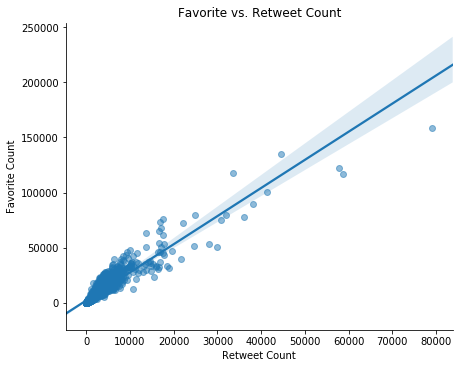

In [277]:
# Plot scatterplot of retweet vs favorite count
sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=df,
           height = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/2})
plt.title('Favorite vs. Retweet Count')
plt.xlabel('Retweet Count')
plt.ylabel('Favorite Count');

Let's try to find the relation between the two variables by running a linear regression analysis

In [267]:
df['intercept'] = 1

In [271]:
# Making a new dataframe to drop NaN values for Linear Regression Analysis
lr_df = df[['intercept','favorite_count','retweet_count']]

In [272]:
lr_df = lr_df.dropna()

In [275]:
import statsmodels.api as sm
lm = sm.OLS(lr_df['favorite_count'],lr_df[['intercept','retweet_count']])
results=lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         favorite_count   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                 1.171e+04
Date:                Thu, 16 Jan 2020   Prob (F-statistic):               0.00
Time:                        15:36:44   Log-Likelihood:                -18613.
No. Observations:                1889   AIC:                         3.723e+04
Df Residuals:                    1887   BIC:                         3.724e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept      2077.0006    121.555     17.087      0.000    1838.604    2315.398
retweet_count     2.5511      0.024    108.200      0.000       2.505       2.597
==============================================================================
Omnibus:                      523.414   Durbin-Watson:                   0.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14893.999
Skew:                           0.680   Prob(JB):                         0.00
Kurtosis:                      16.689   Cond. No.                     5.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Inference:
1. We can determine from the visualization as well as the linear regression results that the number of retweets and the number of favorites are highly positively correlated. The p values in the summary table show a high statistical significance of this relation.
<br>
<br>
2. 86.1 % variability in the number of favorites can be explained by the number of retweets.

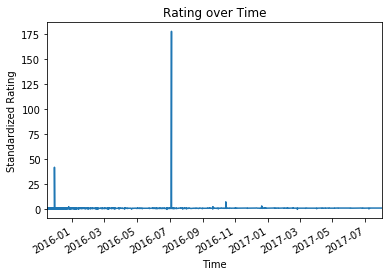

In [281]:
# Plotting standardized ratings over time
df.groupby('timestamp')['rating'].mean().plot(kind='line')
plt.title('Rating over Time')
plt.xlabel('Time')
plt.ylabel('Standardized Rating')
plt.show;

In [282]:
# There are some outliers which have a rating over 2.  
# Let us find them to see if they are inaccurate or just unique.
df.loc[df['rating'] > 2]

,tweet_id,timestamp,source,text,expanded_urls,numerator,denominator,name,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,dog_type,rating,intercept
406,810984652412424192,2016-12-19 23:06:23+00:00,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24.0,7.0,Sam,https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg,golden_retriever,0.871342,1.0,Tibetan_mastiff,0.036708,1.0,Labrador_retriever,0.025823,1.0,5527.0,1492.0,NaN,3.428571,1
548,786709082849828864,2016-10-13 23:23:56+00:00,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75.0,10.0,Logan,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,Pomeranian,0.467321,1.0,Persian_cat,0.122978,0.0,chow,0.102654,1.0,18831.0,6336.0,NaN,7.500000,1
603,778027034220126208,2016-09-20 00:24:34+00:00,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27.0,10.0,Sophie,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,clumber,0.946718,1.0,cocker_spaniel,0.015950,1.0,Lhasa,0.006519,1.0,6740.0,1669.0,pupper,2.700000,1
791,749981277374128128,2016-07-04 15:00:45+00:00,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10.0,Atticus,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,bow_tie,0.533941,0.0,sunglasses,0.080822,0.0,sunglass,0.050776,0.0,5208.0,2502.0,NaN,177.600000,1
1440,680494726643068929,2015-12-25 21:06:00+00:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26.0,10.0,NaN,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,kuvasz,0.438627,1.0,Samoyed,0.111622,1.0,Great_Pyrenees,0.064061,1.0,1742.0,488.0,NaN,2.600000,1
1783,670842764863651840,2015-11-29 05:52:33+00:00,Twitter for iPhone,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420.0,10.0,NaN,https://pbs.twimg.com/media/CU9P717W4AAOlKx.jpg,microphone,0.096063,0.0,accordion,0.094075,0.0,drumstick,0.061113,0.0,24094.0,8467.0,NaN,42.000000,1


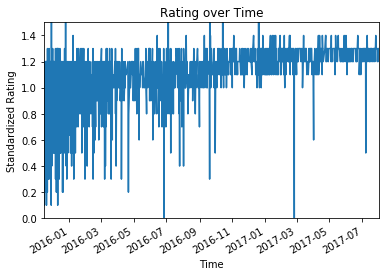

In [289]:
# Plot standardized ratings over time with ylim of 0-2
df.groupby('timestamp')['rating'].mean().plot(kind='line')
plt.ylim(0, 1.5)
plt.title('Rating over Time')
plt.xlabel('Time')
plt.ylabel('Standardized Rating')
plt.show;

#### Inference:
3. For the standardized ratings which are greater than 2, they are mostly jokes. Some ratings like the first one is wronly extracted (24/7). The standardized ratings fluctuated from below 0 to more than 2 before 2016, however since 2017 most of the standardized ratings have been above atleast 1, with very few going below this mark, as seen in the visualization. 